In [1]:
# Panel data -> Time series + Static

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import tensorflow as tf
import sklearn
import sys, os
import requests
import time
import math

/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [5]:
data = pd.read_csv('Data/USMAP_3000points.csv')

In [6]:
print(len(data))
data.head()

3268


,lat,lon
0,48.0,-124.5
1,40.0,-124.0
2,40.5,-124.0
3,41.0,-124.0
4,41.5,-124.0


In [7]:
X = data.lat
Y = data.lon

In [8]:
attr ='air_temperature, clearsky_dhi, clearsky_dni, clearsky_ghi, cloud_type, dew_point, dhi, dni, fill_flag, ghi, relative_humidity, solar_zenith_angle, surface_albedo, surface_pressure, total_precipitable_water, wind_direction, wind_speed'
# year = '1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020'
leap = 'false'
interval = '30'
utc = 'false'
name = 'Archit+Gupta'
affiliation = 'NTU'
mailing_list = 'false'
reason = 'Research'
email = 'archit001@e.ntu.edu'

In [9]:
lon = Y[0]
lat = X[0]
print(lat)
print(lon)

48.0
-124.5


In [10]:
api_key = 'yJWqNPJq3NXlbvu4kpQfqjOUln0Nh4unfovTLvHW'

url98 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=1998, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url98 = url98.replace(" ","")

url99 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=1999, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url99 = url99.replace(" ","")

url00 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2000, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url00 = url00.replace(" ","")

url01 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2001, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url01 = url01.replace(" ","")

url02 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2002, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url02 = url02.replace(" ","")

url03 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2003, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url03 = url03.replace(" ","")

url04 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2004, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url04 = url04.replace(" ","")

url05 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2005, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url05 = url05.replace(" ","")

url06 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2006, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url06 = url06.replace(" ","")

url07 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2007, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url07 = url07.replace(" ","")

url08 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2008, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url08 = url08.replace(" ","")

url09 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2009, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url09 = url09.replace(" ","")

url10 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2010, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url10 = url10.replace(" ","")

url11 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2011, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url11 = url11.replace(" ","")

url12 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2012, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url12 = url12.replace(" ","")

url13 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2013, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url13 = url13.replace(" ","")

url14 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2014, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url14 = url14.replace(" ","")

url15 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2015, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url15 = url15.replace(" ","")

url16 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2016, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url16 = url16.replace(" ","")

url17 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2017, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url17 = url17.replace(" ","")

url18 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2018, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url18 = url18.replace(" ","")

url19 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2019, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url19 = url19.replace(" ","")

url20 = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=2020, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url20 = url20.replace(" ","")

# %2c in url -> comma
# %20 in url -> space

In [11]:
info = pd.read_csv(url98, low_memory=False, nrows = 2)

In [12]:
# print(info.head(n=1))
latitude = info['Latitude']
longitude = info['Longitude']
elevation = info['Elevation']
time_zone = info['Local Time Zone']
print('Latitude: ', latitude[0])
print('Longitude: ', longitude[0])
print('Elevation: ', elevation[0])
print('Time Zone: ',time_zone[0])

Latitude:  48.01
Longitude:  -124.5
Elevation:  87
Time Zone:  -8


In [13]:
df98 = pd.read_csv(url98, low_memory=False, skiprows = 2)
df99 = pd.read_csv(url99, low_memory=False, skiprows = 2)
df00 = pd.read_csv(url00, low_memory=False, skiprows = 2)
df01 = pd.read_csv(url01, low_memory=False, skiprows = 2)
df02 = pd.read_csv(url02, low_memory=False, skiprows = 2)
df03 = pd.read_csv(url03, low_memory=False, skiprows = 2)
df04 = pd.read_csv(url04, low_memory=False, skiprows = 2)
df05 = pd.read_csv(url05, low_memory=False, skiprows = 2)
df06 = pd.read_csv(url06, low_memory=False, skiprows = 2)
df07 = pd.read_csv(url07, low_memory=False, skiprows = 2)
df08 = pd.read_csv(url08, low_memory=False, skiprows = 2)
df09 = pd.read_csv(url09, low_memory=False, skiprows = 2)
df10 = pd.read_csv(url10, low_memory=False, skiprows = 2)
df11 = pd.read_csv(url11, low_memory=False, skiprows = 2)
df12 = pd.read_csv(url12, low_memory=False, skiprows = 2)
df13 = pd.read_csv(url13, low_memory=False, skiprows = 2)
df14 = pd.read_csv(url14, low_memory=False, skiprows = 2)
df15 = pd.read_csv(url15, low_memory=False, skiprows = 2)
df16 = pd.read_csv(url16, low_memory=False, skiprows = 2)
df17 = pd.read_csv(url17, low_memory=False, skiprows = 2)
df18 = pd.read_csv(url18, low_memory=False, skiprows = 2)
df19 = pd.read_csv(url19, low_memory=False, skiprows = 2)
df20 = pd.read_csv(url20, low_memory=False, skiprows = 2)

In [14]:
df = pd.concat([df98, df99, df00, df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20])

In [15]:
df.sample(n=10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
14096,2020,10,21,16,0,10.0,46,607,163,0,...,607,0,163,75.32,78.91,0.120,1012,0.800,328.0,0.8
4573,2006,4,6,6,30,6.0,40,281,71,4,...,281,4,71,95.40,83.54,0.122,1000,1.343,167.3,0.9
10241,2004,8,2,8,30,16.0,94,777,527,3,...,0,0,147,85.68,56.15,0.130,1000,1.980,270.6,0.4
6502,2019,5,16,11,0,14.9,147,822,840,7,...,56,0,413,85.08,32.54,0.130,992,2.600,308.0,0.6
4560,2013,4,6,0,0,8.0,0,0,0,4,...,0,0,0,100.00,125.24,0.120,990,1.700,188.1,1.4
6239,2020,5,10,23,30,14.3,0,0,0,7,...,0,0,0,94.51,113.23,0.120,997,3.000,187.0,0.5
7479,2007,6,5,19,30,9.0,30,268,55,0,...,268,0,55,95.40,84.76,0.141,1000,1.240,265.2,0.7
4195,2000,3,29,9,30,7.0,119,765,529,1,...,765,0,529,79.95,57.65,0.126,1010,0.891,109.4,0.0
5850,2008,5,2,21,0,7.0,0,0,0,8,...,0,0,0,100.00,102.85,0.133,1010,1.850,304.9,0.8
2337,2010,2,18,16,30,8.0,48,569,154,0,...,569,0,154,90.60,79.29,0.110,1000,0.685,59.1,0.8


In [16]:
print(df.columns)

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')


In [17]:
print(len(df))

402960


# Data Transformation

In [18]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

In [19]:
df.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                  int64
Temperature           float64
Clearsky DHI            int64
Clearsky DNI            int64
Clearsky GHI            int64
Cloud Type              int64
Dew Point             float64
DHI                     int64
DNI                     int64
Fill Flag               int64
GHI                     int64
Relative Humidity     float64
Solar Zenith Angle    float64
Surface Albedo        float64
Pressure                int64
Precipitable Water    float64
Wind Direction        float64
Wind Speed            float64
dtype: object

Logically, the minute column is only relevant when combined with the hour—that is, we know the time in a unified format. For this purpose, we decided to calculate time in terms of minutes; however, we could've also taken the 24-hour approach\
Moreover, we also need to combine the day and month columns to achive a useful metric; we do so by creating a week column

In [20]:
def weekCalculator(month, day):
    month_to_days = {}
    month_to_days[1] = 0
    month_to_days[2] = 31
    month_to_days[3] = 28
    month_to_days[4] = 31
    month_to_days[5] = 30
    month_to_days[6] = 31
    month_to_days[7] = 30
    month_to_days[8] = 31
    month_to_days[9] = 31
    month_to_days[10] = 30
    month_to_days[11] = 31
    month_to_days[12] = 30
    
    total_days = 0
    for i in range(1, month+1):
        total_days = total_days + month_to_days[i]
    total_days = total_days + day
    week_number = int(total_days/7) + 1
    return week_number

In [21]:
def dayCalculator(month, day):
    month_to_days = {}
    month_to_days[1] = 0
    month_to_days[2] = 31
    month_to_days[3] = 28
    month_to_days[4] = 31
    month_to_days[5] = 30
    month_to_days[6] = 31
    month_to_days[7] = 30
    month_to_days[8] = 31
    month_to_days[9] = 31
    month_to_days[10] = 30
    month_to_days[11] = 31
    month_to_days[12] = 30
    
    total_days = 0
    for i in range(1, month+1):
        total_days = total_days + month_to_days[i]
    total_days = total_days + day
    return total_days

In [22]:
df['Day Number'] = df.apply(lambda df : dayCalculator(int(df['Month']), int(df['Day'])), axis = 1)
df['Week'] = df.apply(lambda df : weekCalculator(int(df['Month']), int(df['Day'])), axis = 1)
df['Time'] = df['Hour']*60 + df['Minute']

Lastly, we can calculate specfiic humidity using relative humidity, temperature, and pressure to reduce the number of features in our model

In [23]:
def sh(rh, temp, p):
    # pressure in millibar
    # temp in C
    # rh in percent
    # precipitable water in millimeter (mm)
    p_Pa = p*100 # in Pa
    exponent_factor = math.exp(17.625/(temp+243.08))
    sh_val = (rh*3800*exponent_factor)/p_Pa
    return sh_val

In [24]:
df['Specific Humidity'] = df.apply(lambda df : sh(float(df['Relative Humidity']), float(df['Temperature']), float(df['Pressure'])), axis = 1)


In [25]:
df_controlled = df.filter(['Year', 'Day Number','Time','Temperature', 'Solar Zenith Angle', 'Surface Albedo', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Specific Humidity', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'DHI', 'DNI', 'GHI', 'Dew Point', 'Fill Flag', 'Wind Direction', 'Wind Speed', 'Precipitable Water'], axis=1)



In [26]:
print(len(df_controlled))
df_controlled.tail(10)
df_controlled.columns

402960


Index(['Year', 'Day Number', 'Time', 'Temperature', 'Solar Zenith Angle',
       'Surface Albedo', 'Cloud Type', 'Relative Humidity', 'Pressure',
       'Specific Humidity', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'DHI', 'DNI', 'GHI', 'Dew Point', 'Fill Flag', 'Wind Direction',
       'Wind Speed', 'Precipitable Water'],
      dtype='object')

Text(0, 0.5, 'Precipitable Water')

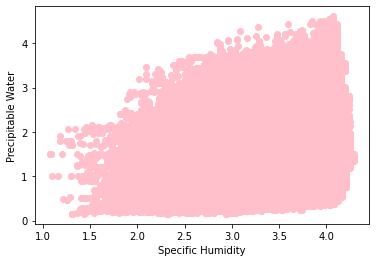

In [27]:
plt.scatter(df['Specific Humidity'], df['Precipitable Water'],color='pink') 
plt.xlabel("Specific Humidity")
plt.ylabel("Precipitable Water")

# Model Building

In [28]:
train, test = sklearn.model_selection.train_test_split(df_controlled, test_size=0.2, random_state = 4)

x_train = train[['Day Number', 'Time', 'Solar Zenith Angle', 'Surface Albedo', 'Relative Humidity', 'Pressure', 'Temperature', 'Cloud Type', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Dew Point', 'Wind Direction', 'Wind Speed', 'Fill Flag', 'DHI' , 'DNI', 'GHI']]
y_train = train[['Precipitable Water']]

x_test = test[['Day Number', 'Time', 'Solar Zenith Angle', 'Surface Albedo', 'Relative Humidity', 'Pressure', 'Temperature', 'Cloud Type', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Dew Point', 'Wind Direction', 'Wind Speed', 'Fill Flag', 'DHI' , 'DNI', 'GHI']]
y_test = test[['Precipitable Water']]

In [29]:
x_test.iloc[1]

Day Number             264.00
Time                  1410.00
Solar Zenith Angle     130.80
Surface Albedo           0.13
Relative Humidity       95.93
Pressure              1002.00
Temperature             14.40
Cloud Type               8.00
Clearsky DHI             0.00
Clearsky DNI             0.00
Clearsky GHI             0.00
Dew Point               13.80
Wind Direction         169.00
Wind Speed               1.10
Fill Flag                0.00
DHI                      0.00
DNI                      0.00
GHI                      0.00
Name: 12671, dtype: float64

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
forest_regression = RandomForestRegressor()
forest_regression.fit(x_train, y_train.values.ravel())

RandomForestRegressor()

In [54]:
y_predicted = forest_regression.predict(x_test)

In [55]:
from sklearn import metrics

print('R-squared:', metrics.r2_score(y_test, y_predicted))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('RMSE represents the square root of the variance of the residuals')

R-squared: 0.9080860826507876
Mean Absolute Error: 0.13403947960095294
Mean Squared Error: 0.04185672645593608
Root Mean Squared Error: 0.20458916505019537
RMSE represents the square root of the variance of the residuals


#### Regular Parameters
R-squared: **0.8537032246315022**\
Mean Absolute Error: 0.1730486832371995\
Mean Squared Error: 0.06662216435318988\
Root Mean Squared Error: 0.25811269700111594

#### Regular Parameters + Clearsky DHI, Clearsky DNI, Clearsky GHI, Dew Point, Wind Direction, Wind Speed + Fill Flag + DHI, DNI, GHI 
#### *All Parameters*
R-squared: **0.9086954739122582**\
Mean Absolute Error: 0.13344735953940837\
Mean Squared Error: 0.04157921545355867\
Root Mean Squared Error: 0.20390982186633058

#### Regular Parameters + Clearsky DHI, Clearsky DNI, Clearsky GHI, Dew Point, Wind Direction, Wind Speed
R-squared: **0.9147016381885086**\
Mean Absolute Error: 0.1282067645672027\
Mean Squared Error: 0.038844065191109535\
Root Mean Squared Error: 0.1970889778529219

#### Regular Parameters + Clearsky DHI, Clearsky DNI, Clearsky GHI, Dew Point, Wind Direction, Wind Speed + Fill Flag
R-squared: **0.9142872768775135**\
Mean Absolute Error: 0.12869180042684136\
Mean Squared Error: 0.03903276140326583\
Root Mean Squared Error: 0.1975671060760516\

#### Specific Humidity
R-squared: **0.8360722862230516**\
Mean Absolute Error: 0.18042629230155188\
Mean Squared Error: 0.07465112653222701\
Root Mean Squared Error: 0.2732235834115112

#### Including The Year
R-squared: 0.8739232484696927\
Mean Absolute Error: 0.15687506278538813\
Mean Squared Error: 0.05741415721851299\
Root Mean Squared Error: 0.2396125147368413\
However, there definitely is **bias** so it is not a good idea to include the year

### LIME

In [56]:
import lime
import lime.lime_tabular

In [57]:
x_train.shape

(322368, 18)

In [58]:
categorical_features = np.argwhere(np.array ([ len(set(x_train.iloc[:,x])) for x in range(x_train.shape[1]) ]) <= 10
                                  ).flatten()

In [59]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train.values, 
    feature_names=x_train.columns,
    class_names=['Precipitable Water'], 
    categorical_features=categorical_features, 
    verbose=True, 
    mode='regression'
)

In [60]:
i = 242
exp = explainer.explain_instance(x_test.iloc[i], forest_regression.predict, num_features=18)

/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4535166041978844
Prediction_local [1.91928275]
Right: 2.564899999999999


In [61]:
# print(x_test.iloc[i], '\n')
print('Real Value: ', y_test.iloc[i][0])
print('Predicted Value: ', y_predicted[i])

Real Value:  2.416
Predicted Value:  2.564899999999999


In [62]:
exp.show_in_notebook(show_table=True)

In [63]:
list1 = exp.as_list()

In [64]:
# Collecting the most impactful variables

In [65]:
dictionary = {}
for i in range(len(list1)):
    val = (list1[i][0])
    result = ''.join([i for i in val if i.isalpha()])
    # result = ''.join([i for i in val if not i.isdigit()])
    dictionary[result] = 0

In [66]:
for i in dictionary:
    print (i, dictionary[i])

DewPoint 0
WindDirection 0
DNI 0
CloudType 0
Pressure 0
Time 0
Temperature 0
ClearskyDNI 0
WindSpeed 0
ClearskyGHI 0
SurfaceAlbedo 0
DHI 0
GHI 0
SolarZenithAngle 0
ClearskyDHI 0
RelativeHumidity 0
DayNumber 0
FillFlag 0


In [67]:
for i in range(10):
    where = np.random.randint(len(x_test))
    print(where)
    exp = explainer.explain_instance(x_test.iloc[where], forest_regression.predict, num_features=18)
    for j in (list1):
        result = ''.join([k for k in j[0] if k.isalpha()])
        dictionary[result] = dictionary[result] + j[1]

6042


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.9122068514217707
Prediction_local [0.72733869]
Right: 0.7789
41683


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3554454957067636
Prediction_local [2.18678666]
Right: 2.362929999999999
13392


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7976434077660532
Prediction_local [1.01830805]
Right: 0.8089200000000006
56259


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7915795597674071
Prediction_local [1.02078431]
Right: 0.9144000000000009
54654


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8316076114718727
Prediction_local [0.98596504]
Right: 0.8502299999999997
20313


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8284622842001501
Prediction_local [1.00921044]
Right: 0.9708100000000003
30976


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.457406651368253
Prediction_local [2.01073888]
Right: 1.9448599999999996
233


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7053403721332008
Prediction_local [1.06314586]
Right: 1.2077200000000015
57283


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.349697612779169
Prediction_local [2.04666721]
Right: 2.0388600000000006
77608


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.1895485685150553
Prediction_local [2.6375246]
Right: 2.7309399999999995


In [68]:
for i in dictionary:
    dictionary[i] = abs(dictionary[i])

In [69]:
for i in dictionary:
    print (i, dictionary[i])

DewPoint 2.78319720724485
WindDirection 1.2040728621128054
DNI 0.9975732546573558
CloudType 0.8696347342811207
Pressure 0.4627535558379332
Time 0.4189595340786947
Temperature 0.2848700511982128
ClearskyDNI 0.23048746203928352
WindSpeed 0.2278402332713459
ClearskyGHI 0.21385403602103445
SurfaceAlbedo 0.13515734209661176
DHI 0.11554781112513896
GHI 0.11144774302220095
SolarZenithAngle 0.058866428658262616
ClearskyDHI 0.03519444629446824
RelativeHumidity 0.03447450495866758
DayNumber 0.03182259821387752
FillFlag 0.024908298119882707


In [70]:
sorted(dictionary, key=dictionary.get, reverse=True)

['DewPoint',
 'WindDirection',
 'DNI',
 'CloudType',
 'Pressure',
 'Time',
 'Temperature',
 'ClearskyDNI',
 'WindSpeed',
 'ClearskyGHI',
 'SurfaceAlbedo',
 'DHI',
 'GHI',
 'SolarZenithAngle',
 'ClearskyDHI',
 'RelativeHumidity',
 'DayNumber',
 'FillFlag']

### SP-LIME

In [71]:
import warnings
from lime import submodular_pick

In [77]:
sp_obj = submodular_pick.SubmodularPick(
    explainer, 
    x_train.values, 
    forest_regression.predict, 
    sample_size=200, 
    num_features=18, 
    num_exps_desired=5)

/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7293486442732642
Prediction_local [1.12046613]
Right: 1.7377400000000023


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2145748212503673
Prediction_local [2.3862133]
Right: 2.6856100000000005


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.366253577888681
Prediction_local [1.9909706]
Right: 2.144259999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5369016045781339
Prediction_local [1.62742134]
Right: 1.2781300000000007


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8205932417758586
Prediction_local [1.07446338]
Right: 1.7162100000000011


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4896562823296144
Prediction_local [1.61018074]
Right: 2.2871499999999974


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.683842393646456
Prediction_local [1.10028304]
Right: 1.02183


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5896530567373641
Prediction_local [1.47384165]
Right: 1.7476300000000002


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3390649794712723
Prediction_local [2.28097673]
Right: 2.197049999999999


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5359983656959573
Prediction_local [1.60425201]
Right: 2.2618799999999966


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8031797920963002
Prediction_local [0.9917311]
Right: 1.0432799999999995


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.415885957555527
Prediction_local [2.20268025]
Right: 2.565299999999995


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8217702150069743
Prediction_local [1.03717782]
Right: 1.1945700000000017


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5788609826424462
Prediction_local [1.52198053]
Right: 1.8909600000000035


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3787441911117488
Prediction_local [2.09023124]
Right: 2.7325599999999977


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4050111786924373
Prediction_local [2.1414647]
Right: 2.0098399999999983


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7438174940350342
Prediction_local [1.22241508]
Right: 1.4700400000000022


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4799736163471218
Prediction_local [1.75170797]
Right: 2.0099299999999993


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4211122362917021
Prediction_local [2.243546]
Right: 2.3927999999999967


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8064709167032555
Prediction_local [1.17265433]
Right: 2.10223


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4743078118767998
Prediction_local [1.90532633]
Right: 2.1581000000000015


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.300819751467848
Prediction_local [2.26477784]
Right: 1.62295


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5748670608207886
Prediction_local [1.78407553]
Right: 1.9827699999999984


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.214446737235465
Prediction_local [2.50297819]
Right: 3.208850000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.319634733296133
Prediction_local [1.95041414]
Right: 1.8180000000000016


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.296184221598805
Prediction_local [2.22317932]
Right: 1.50968


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2228272850603874
Prediction_local [2.51330943]
Right: 3.3396600000000025


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2342478469744935
Prediction_local [2.37447307]
Right: 1.6331799999999972


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.594735467931621
Prediction_local [1.31427516]
Right: 1.5963900000000018


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8183026708890115
Prediction_local [0.9835002]
Right: 1.2285200000000005


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3987772544042247
Prediction_local [2.08711212]
Right: 3.2745500000000036


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2157914087399893
Prediction_local [2.51954804]
Right: 2.408860000000004


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7367237317361086
Prediction_local [1.13555704]
Right: 1.124770000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3968319667737692
Prediction_local [1.74536605]
Right: 2.518989999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5278265949321432
Prediction_local [1.87327713]
Right: 1.917539999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5578311972450107
Prediction_local [1.26265174]
Right: 1.3017700000000014


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8408913372584181
Prediction_local [1.11226668]
Right: 1.2052100000000008


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2846517089701293
Prediction_local [2.35759573]
Right: 2.8213499999999994


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8941312905978709
Prediction_local [0.95220351]
Right: 1.2359700000000007


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2999725322767084
Prediction_local [2.33769031]
Right: 1.9739400000000011


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2293721778223836
Prediction_local [2.65961465]
Right: 3.6094200000000023


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.9939609971602412
Prediction_local [0.59642382]
Right: 0.5362999999999996


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.619182859289306
Prediction_local [1.53461347]
Right: 1.929090000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5255237270315265
Prediction_local [1.53659607]
Right: 1.3947900000000018


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.1674144165154878
Prediction_local [2.7342126]
Right: 3.9573900000000033


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7827757566077895
Prediction_local [1.21602631]
Right: 1.7506199999999992


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8484576239987789
Prediction_local [0.8454519]
Right: 0.43580000000000024


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7619186184394657
Prediction_local [1.06930678]
Right: 1.2666400000000007


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4726384714779746
Prediction_local [2.04350945]
Right: 1.9851899999999991


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8765649589887614
Prediction_local [0.76972191]
Right: 1.5512399999999986


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.997445287316903
Prediction_local [0.64061743]
Right: 0.7246599999999995


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3459346895355522
Prediction_local [1.99801024]
Right: 2.285070000000002


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.753611732379214
Prediction_local [1.1893501]
Right: 1.2081699999999977


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.590184571613024
Prediction_local [1.32548662]
Right: 1.790539999999999


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4096305710402974
Prediction_local [2.0037319]
Right: 2.1267699999999996


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3466337695258077
Prediction_local [2.17876107]
Right: 1.694810000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2640812120085918
Prediction_local [2.2904973]
Right: 1.9221599999999972


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.860860592434575
Prediction_local [0.90341793]
Right: 0.71624


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4357369844624859
Prediction_local [2.03753293]
Right: 2.4498900000000017


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.591057543264152
Prediction_local [1.45158888]
Right: 1.4754900000000004


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3806732747137431
Prediction_local [1.89010925]
Right: 1.5745700000000005


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2723289789808747
Prediction_local [2.39870583]
Right: 3.5056199999999995


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7528994049990434
Prediction_local [1.15168342]
Right: 0.9839500000000002


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2205524988103216
Prediction_local [2.51189425]
Right: 1.980030000000003


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5918693138904816
Prediction_local [1.45011538]
Right: 1.3650199999999995


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7907957031317363
Prediction_local [1.15738892]
Right: 1.2169999999999996


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.6300283635256343
Prediction_local [1.25163946]
Right: 1.7704400000000016


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.774541356925601
Prediction_local [1.08159654]
Right: 1.0718600000000007


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7589982409927283
Prediction_local [1.25838084]
Right: 1.7487200000000025


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3133391625430073
Prediction_local [2.31889654]
Right: 2.1884200000000016


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7928691488202642
Prediction_local [0.94557675]
Right: 1.0189200000000012


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2949862759952186
Prediction_local [2.4963119]
Right: 2.2010700000000014


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8443023763876183
Prediction_local [0.88536572]
Right: 1.0105800000000003


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8474406866629258
Prediction_local [0.86093553]
Right: 0.44732000000000033


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4853562044371524
Prediction_local [1.94892783]
Right: 2.0980699999999968


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2246642691395129
Prediction_local [2.26267851]
Right: 2.3018399999999954


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8824092044750569
Prediction_local [1.01077786]
Right: 0.9971499999999991


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8547328964712875
Prediction_local [0.96197911]
Right: 1.4780000000000004


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2399042978253434
Prediction_local [2.53626694]
Right: 2.091589999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.6020793901906933
Prediction_local [1.49976989]
Right: 1.7323999999999995


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2958423785277
Prediction_local [2.34195809]
Right: 2.091190000000002


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4004996610355123
Prediction_local [1.8096563]
Right: 1.3045299999999989


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.6818113881225385
Prediction_local [1.26874132]
Right: 1.2584299999999997


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4226741316454405
Prediction_local [2.02680411]
Right: 2.772949999999997


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5751671632066198
Prediction_local [1.54042831]
Right: 1.6344599999999982


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7811339794864247
Prediction_local [1.20174148]
Right: 1.0028699999999993


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5505957084682511
Prediction_local [1.58544408]
Right: 1.9639100000000023


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.943238939580518
Prediction_local [0.84298091]
Right: 1.2577199999999984


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2476459459267386
Prediction_local [2.46306053]
Right: 2.121419999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8347528060708889
Prediction_local [1.02082433]
Right: 0.5191899999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.6038145400942438
Prediction_local [1.23349243]
Right: 1.5100299999999993


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5445661993754733
Prediction_local [1.95396523]
Right: 1.7726600000000008


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3123702382767437
Prediction_local [2.13037609]
Right: 1.5205399999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4914932474196547
Prediction_local [1.80590646]
Right: 1.5964299999999993


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.9913835706536596
Prediction_local [0.82535359]
Right: 0.9176300000000007


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5688270467475474
Prediction_local [1.56246267]
Right: 1.9194299999999995


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5071124557670839
Prediction_local [1.66875013]
Right: 2.3860300000000025


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4843724776165301
Prediction_local [1.9607154]
Right: 1.758049999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.58465007253895
Prediction_local [1.40149008]
Right: 1.2348400000000006


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.9449923326970269
Prediction_local [0.85772243]
Right: 0.8250999999999994


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3158008257638794
Prediction_local [2.20755362]
Right: 2.1199099999999977


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5388840340213794
Prediction_local [1.47297144]
Right: 1.9259000000000004


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4660811489209942
Prediction_local [1.71165041]
Right: 1.165280000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8040053508744784
Prediction_local [1.05144421]
Right: 1.231719999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.6029974286090647
Prediction_local [1.48324263]
Right: 1.4386600000000014


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2612714645895708
Prediction_local [2.41747738]
Right: 2.0682799999999975


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.6726535409966856
Prediction_local [1.20770416]
Right: 1.2272300000000014


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4645836400529777
Prediction_local [1.80766118]
Right: 2.046599999999999


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7476576041197234
Prediction_local [1.19646973]
Right: 1.7640799999999992


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.660141513352504
Prediction_local [1.5186346]
Right: 1.9821700000000029


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8363801464931258
Prediction_local [0.88100591]
Right: 1.1391399999999994


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7801874059438378
Prediction_local [1.1220073]
Right: 1.1067699999999987


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3032918093961907
Prediction_local [2.36964009]
Right: 1.962740000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.443265586352861
Prediction_local [1.95005129]
Right: 1.99408


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7880345881556492
Prediction_local [1.08120184]
Right: 1.332560000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.236741889999728
Prediction_local [2.35563971]
Right: 2.42833


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5363235777556927
Prediction_local [1.50298943]
Right: 2.1413399999999982


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.6390219099574732
Prediction_local [1.35340842]
Right: 0.8462700000000011


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8388452691545742
Prediction_local [1.05293267]
Right: 0.8852100000000002


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2496188598344542
Prediction_local [2.39448368]
Right: 2.055839999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.9202048089985437
Prediction_local [0.97540714]
Right: 1.3267800000000007


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5428960552019464
Prediction_local [1.62273988]
Right: 1.2398800000000016


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3126166707678761
Prediction_local [2.51564744]
Right: 2.1246999999999967


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4400078546724566
Prediction_local [2.08071659]
Right: 1.3170099999999993


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8361729063315788
Prediction_local [1.0355049]
Right: 1.6357600000000003


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8453024576003016
Prediction_local [0.91116897]
Right: 0.9385400000000008


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4847409205562456
Prediction_local [1.99282245]
Right: 1.7678099999999983


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.301078966391466
Prediction_local [2.42456814]
Right: 2.6483099999999973


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7152431634436127
Prediction_local [1.26228863]
Right: 1.5732000000000002


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.810171053419721
Prediction_local [1.02979987]
Right: 0.8346499999999994


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.883062631738972
Prediction_local [0.78610006]
Right: 0.8585299999999996


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4678479443919707
Prediction_local [1.79024234]
Right: 1.9919699999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.37042858836694
Prediction_local [2.10293231]
Right: 2.3760100000000035


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.833131897258098
Prediction_local [1.0829057]
Right: 1.0078600000000002


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.343155689137284
Prediction_local [2.23512966]
Right: 2.2403599999999972


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4018207495242738
Prediction_local [1.86160872]
Right: 1.342260000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.369165926261057
Prediction_local [2.17376425]
Right: 2.0462899999999986


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2024189671931074
Prediction_local [2.59902905]
Right: 2.3899400000000037


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3821596666898082
Prediction_local [2.3589277]
Right: 2.320199999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2265579670013365
Prediction_local [2.33688494]
Right: 2.47178


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5150216393714226
Prediction_local [1.67188303]
Right: 1.2303599999999983


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2506639914579407
Prediction_local [2.38918923]
Right: 2.8688499999999992


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.558633543446265
Prediction_local [1.63811097]
Right: 2.1963000000000013


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2287730975578053
Prediction_local [2.5107115]
Right: 2.503530000000002


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3706242309580483
Prediction_local [2.03240028]
Right: 2.427949999999996


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5073220662003077
Prediction_local [1.49960731]
Right: 1.2717700000000003


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7814396443885105
Prediction_local [1.1574198]
Right: 1.1211099999999987


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.9674616744361906
Prediction_local [0.70233316]
Right: 0.6675000000000011


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.38619910496097
Prediction_local [2.27918092]
Right: 1.9825300000000023


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.999087517807145
Prediction_local [0.69394972]
Right: 0.8990399999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8073705750044358
Prediction_local [1.05939851]
Right: 0.8012899999999987


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4546881060564827
Prediction_local [1.67594844]
Right: 1.6359300000000019


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8379692987320913
Prediction_local [1.13165974]
Right: 1.325190000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5031669187636947
Prediction_local [1.55676947]
Right: 2.2292799999999993


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4111952316632754
Prediction_local [1.87608309]
Right: 1.2030500000000017


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8081824869119798
Prediction_local [1.09683668]
Right: 1.8673400000000016


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5070648370496817
Prediction_local [1.91205014]
Right: 1.7548600000000016


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7226416376678757
Prediction_local [1.14000589]
Right: 1.5901300000000018


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8427429865033926
Prediction_local [0.95765486]
Right: 1.6194300000000013


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.776401771582246
Prediction_local [1.02025303]
Right: 0.5272000000000004


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.558464782053725
Prediction_local [1.8688796]
Right: 1.374709999999999


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.440923946914775
Prediction_local [2.04977106]
Right: 3.1699299999999955


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7620526588996146
Prediction_local [1.04108597]
Right: 1.22581


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.250187642505304
Prediction_local [2.55496449]
Right: 2.620619999999998


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.523523141170698
Prediction_local [1.67943836]
Right: 1.4905700000000002


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.617445535505561
Prediction_local [1.26594889]
Right: 1.1226699999999996


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7953057484930721
Prediction_local [0.96777604]
Right: 1.1052299999999982


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4493015369937094
Prediction_local [2.04798864]
Right: 1.9957999999999967


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5097968859584017
Prediction_local [1.65403099]
Right: 1.2668700000000015


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8640320288250356
Prediction_local [0.76790595]
Right: 1.0007400000000002


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.9140853286050596
Prediction_local [0.955193]
Right: 1.19925


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5256092691058336
Prediction_local [1.61069828]
Right: 1.9608600000000018


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8435611065514557
Prediction_local [0.83940617]
Right: 1.155790000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3566855451666482
Prediction_local [2.20511831]
Right: 1.709060000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2916498472623894
Prediction_local [2.43949087]
Right: 2.896870000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4488281197716295
Prediction_local [1.75205485]
Right: 2.180979999999997


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.870434301824342
Prediction_local [0.79913753]
Right: 1.0254999999999987


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4534304144183472
Prediction_local [1.76709234]
Right: 1.780000000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3660478930242146
Prediction_local [1.82481677]
Right: 1.4897799999999992


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8249531172298838
Prediction_local [1.00606299]
Right: 0.8946500000000002


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8679538398556188
Prediction_local [1.03250678]
Right: 1.0782300000000005


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5660222450220864
Prediction_local [1.42708141]
Right: 1.0005899999999992


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4418442123266832
Prediction_local [2.01186351]
Right: 1.6542299999999994


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2364784059866316
Prediction_local [2.27903244]
Right: 2.1342600000000003


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8204998912328763
Prediction_local [0.962696]
Right: 1.1834199999999995


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.412018217504981
Prediction_local [1.9648334]
Right: 2.5507699999999955


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7882170851876849
Prediction_local [1.1350211]
Right: 1.6375300000000008


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.2071307992690448
Prediction_local [2.57680189]
Right: 3.1425599999999996


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7768866662090703
Prediction_local [1.12626768]
Right: 2.0724700000000023


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3719244510271247
Prediction_local [1.92622471]
Right: 1.9683399999999995


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.8335295515247885
Prediction_local [1.0788809]
Right: 1.6314199999999983


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.568002997715076
Prediction_local [1.46484737]
Right: 1.3836800000000014


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.3869934564823838
Prediction_local [1.96285684]
Right: 1.3988


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4985927353934543
Prediction_local [1.54299736]
Right: 1.312749999999999


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.9338364779226445
Prediction_local [0.6621417]
Right: 0.8208500000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7404536953560106
Prediction_local [1.13787525]
Right: 1.22188


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7854463389915556
Prediction_local [1.12704974]
Right: 1.3067100000000014


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.4701194056297548
Prediction_local [1.64178833]
Right: 1.8071700000000006


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.5518105916042146
Prediction_local [1.51053892]
Right: 1.546530000000001


/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1.7887114526527452
Prediction_local [1.05316186]
Right: 1.6016599999999994


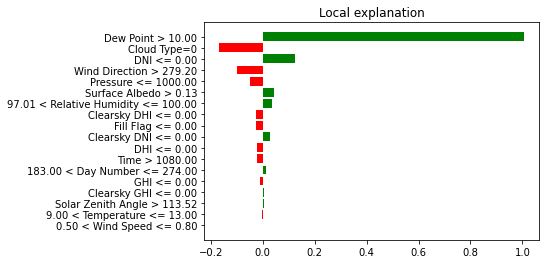

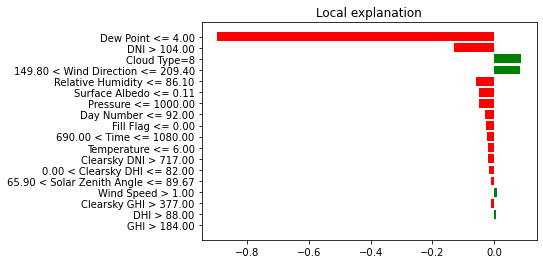

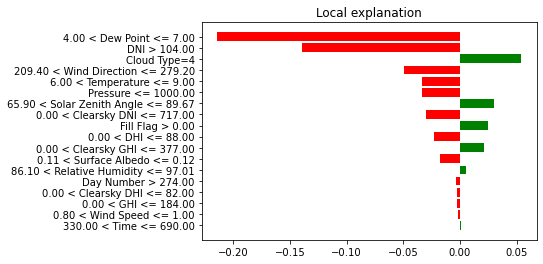

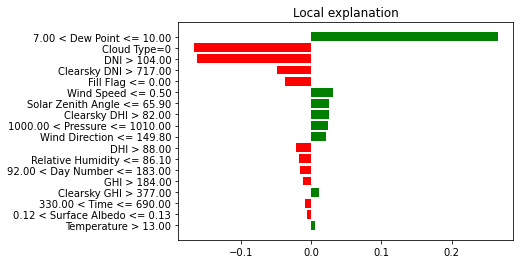

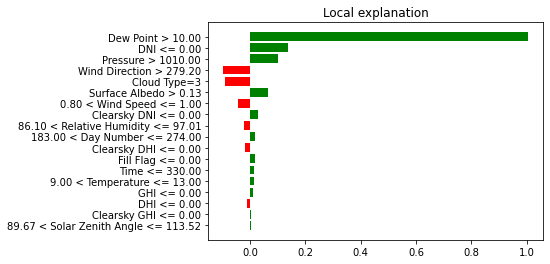

In [78]:
[exp.as_pyplot_figure() for exp in sp_obj.sp_explanations];

In [79]:
import pandas as pd
W=pd.DataFrame([dict(this.as_list()) for this in sp_obj.explanations])

In [80]:
W.head()

,Dew Point <= 4.00,Cloud Type=7,DNI <= 0.00,97.01 < Relative Humidity <= 100.00,Day Number <= 92.00,Pressure <= 1000.00,Clearsky DNI <= 0.00,Fill Flag <= 0.00,0.50 < Wind Speed <= 0.80,Wind Direction <= 149.80,...,0.80 < Wind Speed <= 1.00,0.00 < DHI <= 88.00,0.00 < GHI <= 184.00,Cloud Type=1,9.00 < Temperature <= 13.00,Pressure > 1010.00,209.40 < Wind Direction <= 279.20,Solar Zenith Angle > 113.52,Cloud Type=2,Cloud Type=9
0,-0.905246,0.124676,0.121154,0.054134,-0.041365,-0.028102,0.026282,0.025256,0.020152,0.017820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.108622,0.057815,NaN,-0.041221,0.029311,0.044189,0.003268,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.106862,0.115473,0.082097,-0.007429,-0.031106,NaN,NaN,-0.014671,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016386,NaN,0.022658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.925829,NaN,0.119403,NaN,-0.038029,-0.028622,0.030140,-0.017829,NaN,0.038954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# im=W.hist('DNI <= 0.00',bins=20)

### Updated Model (features picked using SP-LIME)

In [99]:
train, test = sklearn.model_selection.train_test_split(df_controlled, test_size=0.2, random_state = 4)

x_train = train[['Dew Point', 'Cloud Type', 'DNI', 'Wind Direction', 'Surface Albedo', 'Pressure']]
y_train = train[['Precipitable Water']]

x_test = test[['Dew Point', 'Cloud Type', 'DNI', 'Wind Direction', 'Surface Albedo', 'Pressure']]
y_test = test[['Precipitable Water']]

In [100]:
from sklearn.ensemble import RandomForestRegressor
forest_regression = RandomForestRegressor()
forest_regression.fit(x_train, y_train.values.ravel())

RandomForestRegressor()

In [101]:
y_predicted = forest_regression.predict(x_test)

In [102]:
from sklearn import metrics

print('R-squared:', metrics.r2_score(y_test, y_predicted))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('RMSE represents the square root of the variance of the residuals')

R-squared: 0.8533130890738179
Mean Absolute Error: 0.16937362776750334
Mean Squared Error: 0.06679982838699106
Root Mean Squared Error: 0.25845662767085514
RMSE represents the square root of the variance of the residuals


## Linear Regression

In [ ]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)

In [ ]:
y_predicted = linear_regression.predict(x_test)

In [ ]:
from sklearn import metrics

print('R-squared:', metrics.r2_score(y_test, y_predicted))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

## Neural Network

In [ ]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout

In [112]:
def scale_datasets(x_train, x_test):
    
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
          standard_scaler.fit_transform(x_train),
          columns=x_train.columns
          )
    
    x_test_scaled = pd.DataFrame(
          standard_scaler.transform(x_test),
          columns = x_test.columns
      )
    
    return x_train_scaled, x_test_scaled

In [113]:
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [114]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01

In [115]:
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='linear')
      ])
    return model

In [116]:
# build the model
model = build_model_using_sequential()

In [117]:
# loss function
mse = tf.keras.losses.MeanSquaredError()
model.compile(
    loss=mse, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mse]
)

In [128]:
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=1024,
    validation_split=0.2
)

Epoch 1/10
252/252 [==============================] - 1s 4ms/step - loss: 0.4561 - mean_squared_error: 0.4561 - val_loss: 0.4518 - val_mean_squared_error: 0.4518
Epoch 2/10
252/252 [==============================] - 1s 4ms/step - loss: 0.4561 - mean_squared_error: 0.4561 - val_loss: 0.4517 - val_mean_squared_error: 0.4517
Epoch 3/10
252/252 [==============================] - 1s 4ms/step - loss: 0.4561 - mean_squared_error: 0.4561 - val_loss: 0.4518 - val_mean_squared_error: 0.4518
Epoch 4/10
252/252 [==============================] - 1s 4ms/step - loss: 0.4561 - mean_squared_error: 0.4561 - val_loss: 0.4517 - val_mean_squared_error: 0.4517
Epoch 5/10
252/252 [==============================] - 1s 4ms/step - loss: 0.4561 - mean_squared_error: 0.4561 - val_loss: 0.4517 - val_mean_squared_error: 0.4517
Epoch 6/10
252/252 [==============================] - 1s 4ms/step - loss: 0.4562 - mean_squared_error: 0.4562 - val_loss: 0.4517 - val_mean_squared_error: 0.4517
Epoch 7/10
252/252 [========

In [129]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()

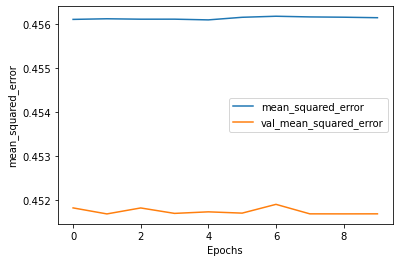

In [130]:
# Plot the history
plot_history(history, 'mean_squared_error')

In [131]:
y_predicted = model.predict(x_test_scaled)

In [132]:
from sklearn import metrics

print('R-squared:', metrics.r2_score(y_test, y_predicted))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

R-squared: -1.986455753710814e-05
Mean Absolute Error: 0.5425966557159485
Mean Squared Error: 0.455399564379961
Root Mean Squared Error: 0.674832989990828
